### Find which customer are at the highest risk of leaving the bank
- Target label: Exited
- Feature variable:

Part0: EDA 
Part1: Data Preprocessing <br>
Part2: building ANN <br>
Part3: Training ANN <br>
Part4: Making prediction and evaluating model<br>

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
import seaborn as sns

In [16]:
### For records 
print( f"Tensorflow: {tf.__version__} , Pandas: {pd.__version__}")

Tensorflow: 2.3.0 , Pandas: 1.2.4


### Part0: EDA on the Data set

In [236]:
df = pd.read_csv("Data/Churn_Modelling.csv")

In [65]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0


In [17]:
dfs = DataFrameSummary(df)

In [19]:
dfs.columns_stats

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
counts,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
uniques,10000,10000,2932,460,3,2,70,11,6382,4,2,2,9999,2
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,numeric,categorical,numeric,categorical,bool,numeric,numeric,numeric,numeric,bool,bool,numeric,bool


### Summary 
- No missing data 
- Distribution of data among numeric, categorical and boolean types

In [22]:
pd.options.display.float_format = "{:,.2f}".format
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


<AxesSubplot:>

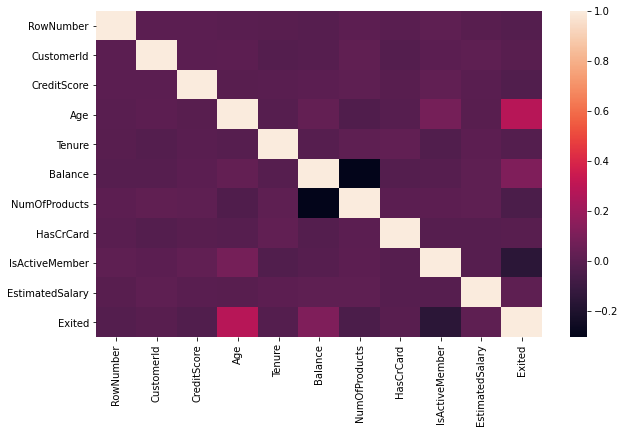

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

### Part1: Preprocessing the Dataset

1. Convert the dataframe into array. 
   - Drop column #1,2, 3(row number, cust ID, surname) <br> 
2. Separate feature and target variables
3. Encoding for cateogorical data 
4. Split Train/test

In [99]:
dataset = df.to_numpy()
#X = dataset[:,3:-1]
#y = dataset[:,-1]
print(type(X), X.shape)

<class 'numpy.ndarray'> (10000, 10)


In [100]:
#dataset = df.to_numpy()
X = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values
print(type(X), X.shape)

<class 'numpy.ndarray'> (10000, 10)


In [101]:
print(X.shape, y.shape)

(10000, 10) (10000,)


In [102]:
print(X[0:2])

[[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]]


#### Label encoding of cateogorical data "Gender"

In [103]:
from sklearn.preprocessing import LabelEncoder
l_E = LabelEncoder()
X[:,2] = l_E.fit_transform(X[:,2])

In [104]:
print(X[0:2])

[[619 'France' 0 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 0 41 1 83807.86 1 0 1 112542.58]]


In [105]:
unique_elements, counts_elements = np.unique(X[:,2], return_counts=True)

In [106]:
unique_elements

array([0, 1], dtype=object)

In [107]:
counts_elements

array([4543, 5457], dtype=int64)

### Label encoding of cateogorical data "Geography"

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [109]:
#### Lets perform Onehot encoding for country column
col_T = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])], remainder='passthrough')
X = np.array(col_T.fit_transform(X))

In [110]:
X[:2,:]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58]],
      dtype=object)

#### After OneHotEncdong we have three new columns for  Geography 

### Split the Train/Test data 

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### Feature scaling ( must have for Neural networks)

In [112]:
from sklearn.preprocessing import StandardScaler
std_Sc = StandardScaler()
X_train = std_Sc.fit_transform(X_train)
X_test = std_Sc.transform(X_test)

### Part-2 Building the Model 
1. Initializes ann with Sequential class 
2. Add input layer and dense hidden layer

In [113]:
ann = tf.keras.models.Sequential()

#### Add first hidden layer 

In [114]:
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))

#### Add second hidden layer 

In [115]:
ann.add(tf.keras.layers.Dense(units=6, activation = 'relu'))

#### Add output layer

In [116]:
ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

#### Compiling the model

In [117]:
ann.compile(optimizer= "adam", loss= 'binary_crossentropy', metrics=['accuracy'])

In [118]:
ann.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
250/250 [==============================] - 0s 704us/step - loss: 0.5207 - accuracy: 0.7954
Epoch 2/20
250/250 [==============================] - 0s 584us/step - loss: 0.4595 - accuracy: 0.7961
Epoch 3/20
250/250 [==============================] - 0s 576us/step - loss: 0.4392 - accuracy: 0.7983
Epoch 4/20
250/250 [==============================] - 0s 580us/step - loss: 0.4284 - accuracy: 0.8095
Epoch 5/20
250/250 [==============================] - 0s 580us/step - loss: 0.4196 - accuracy: 0.8120
Epoch 6/20
250/250 [==============================] - 0s 640us/step - loss: 0.4101 - accuracy: 0.8191
Epoch 7/20
250/250 [==============================] - 0s 564us/step - loss: 0.4001 - accuracy: 0.8270
Epoch 8/20
250/250 [==============================] - 0s 572us/step - loss: 0.3895 - accuracy: 0.8367
Epoch 9/20
250/250 [==============================] - 0s 577us/step - loss: 0.3801 - accuracy: 0.8418
Epoch 10/20
250/250 [==============================] - 0s 568us/step - loss: 0.372

### Lets look at our model summary 

In [120]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (32, 6)                   78        
_________________________________________________________________
dense_5 (Dense)              (32, 6)                   42        
_________________________________________________________________
dense_6 (Dense)              (32, 1)                   7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


### Lets make out first prediction, customer#1

In [129]:
ann.predict(std_Sc.transform([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88]]))

array([[0.47594553]], dtype=float32)

- Summary: Probablity of this customer leaving the bank is .4

### Lets make one more prediction on another, customer#2

In [136]:
ann.predict(std_Sc.transform([[1.0, 0.0, 0.0, 600, 0, 40, 3, 60000.0, 2, 1, 1, 50000.00]]))

array([[0.04137823]], dtype=float32)

- Summary: Probablity of this customer leaving the bank is .04(very low)

In [ ]:
### Some more summarization for both

In [138]:
prob_Customer1 = ann.predict(std_Sc.transform([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88]]))
prob_Customer2 = ann.predict(std_Sc.transform([[1.0, 0.0, 0.0, 600, 0, 40, 3, 60000.0, 2, 1, 1, 50000.00]]))

In [145]:
print(prob_Customer1, prob_Customer2)

[[0.47594553]] [[0.04137823]]


In [143]:
"Customer will leave" if (prob_Customer1 > .45) else "Customer will stay"

'Cusomer will leave'

In [146]:
"Customer will leave" if (prob_Customer2 > .45) else "Customer will stay"

'Customer will stay'

## Predicting the Testset Results 

In [218]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.45)


#print(np.concatenate(y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1),1))

### Reshaping for comparison 

In [219]:
print("y_pred before:",y_pred.shape)
#y_pred = y_pred.reshape(1,-1)
print("y_pred after:",y_pred.shape)

y_pred before: (2000, 1)
y_pred after: (2000, 1)


In [220]:
print("y_test before:",y_test.shape)
y_test = y_test.reshape(len(y_test),1)
print("y_test after:",y_test.shape)

y_test before: (2000, 1)
y_test after: (2000, 1)


In [221]:
np.concatenate((y_pred, y_test),1)
# First column is predict and the second column is actual value form test data 

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

### Using confusion matrix to qualtify the accuracy of the model

In [222]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n",cf_matrix)

Confusion matrix:
 [[1492  103]
 [ 182  223]]


<Figure size 720x432 with 0 Axes>

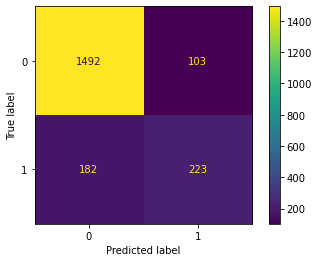

In [235]:
### Display confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(10,6))
disp.plot()


### Accuracy score 

In [233]:
print("Accuracy score is :",accuracy_score(y_test, y_pred))

Accuracy score is : 0.8575


### Summary: 
- Accuracy of the model : .85 <br> i.e 85% of the time the model will be able to predict the customer churn outcome correctly
